In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import straticor as scr

plt.style.use("https://raw.githubusercontent.com/srnarvaez/my-mpl-themes/main/basic.mplstyle")

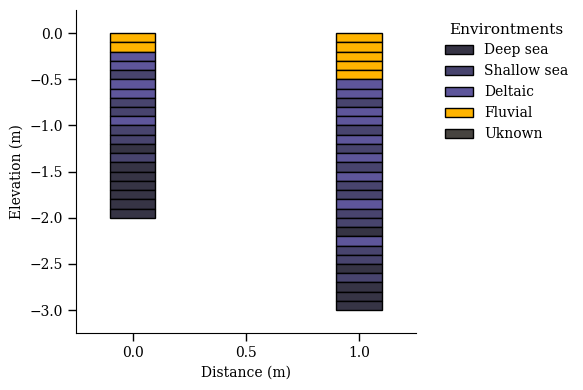

In [2]:
col_1 = pd.read_excel("../data/fake_columns.xlsx", sheet_name=0)
col_2 = pd.read_excel("../data/fake_columns.xlsx", sheet_name=1)

fig, ax = plt.subplots(figsize=(6, 4))

scr.plot_column(col_1, ax=ax, x_pos=-0.1)
scr.plot_column(col_2, ax=ax, x_pos=0.9)

ax.set(
    xlabel="Distance (m)",
    ylabel="Elevation (m)",
    xticks=np.arange(-0.5, 1.5, 0.5),
    xlim=(-0.25, 1.25),
    ylim=(min(col_1["bottom"].min(), col_2["bottom"].min()) - 0.25, max(col_1["bottom"].max(), col_2["bottom"].max()) + 0.25),
)

plt.show()

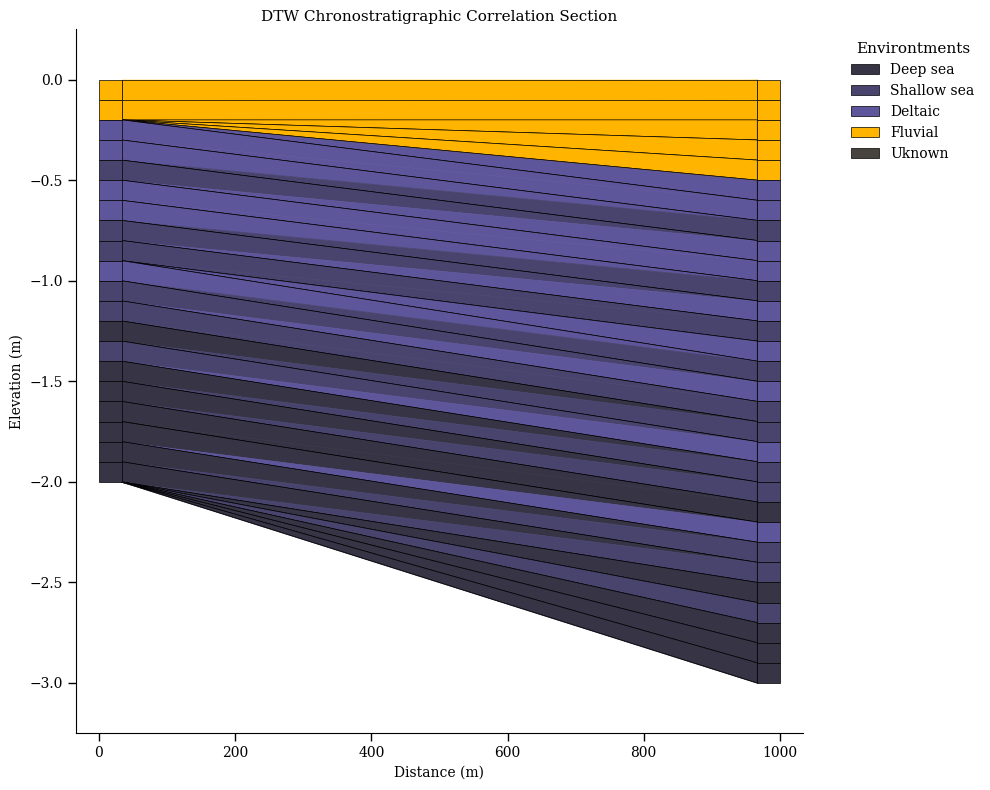

In [3]:
space = 1000

distance, corr_matrix = scr.dtw_log(col_1, col_2, distality=1, alpha=0.49, cost_func="chrono", penalty=0.1)
col_3, corr_path = scr.warp_log(col_1, col_2, paths=corr_matrix)

fig, ax = plt.subplots(figsize=(10, 8))

ax = scr.plot_section(col_1, col_2, space=space, corr_path=corr_path, ax=ax, lw=0.5)

ax.set(
    title="DTW Chronostratigraphic Correlation Section",
    xlabel="Distance (m)",
    ylabel="Elevation (m)",
    xlim=(0 - space/30, space + space/30),
    ylim=(min(col_1["bottom"].min(), col_2["bottom"].min()) - 0.25, max(col_1["bottom"].max(), col_2["bottom"].max()) + 0.25),
)

fig.savefig("../images/dtw_chronostratigraphic_correlation_section.png", dpi=300, bbox_inches="tight")

plt.show()

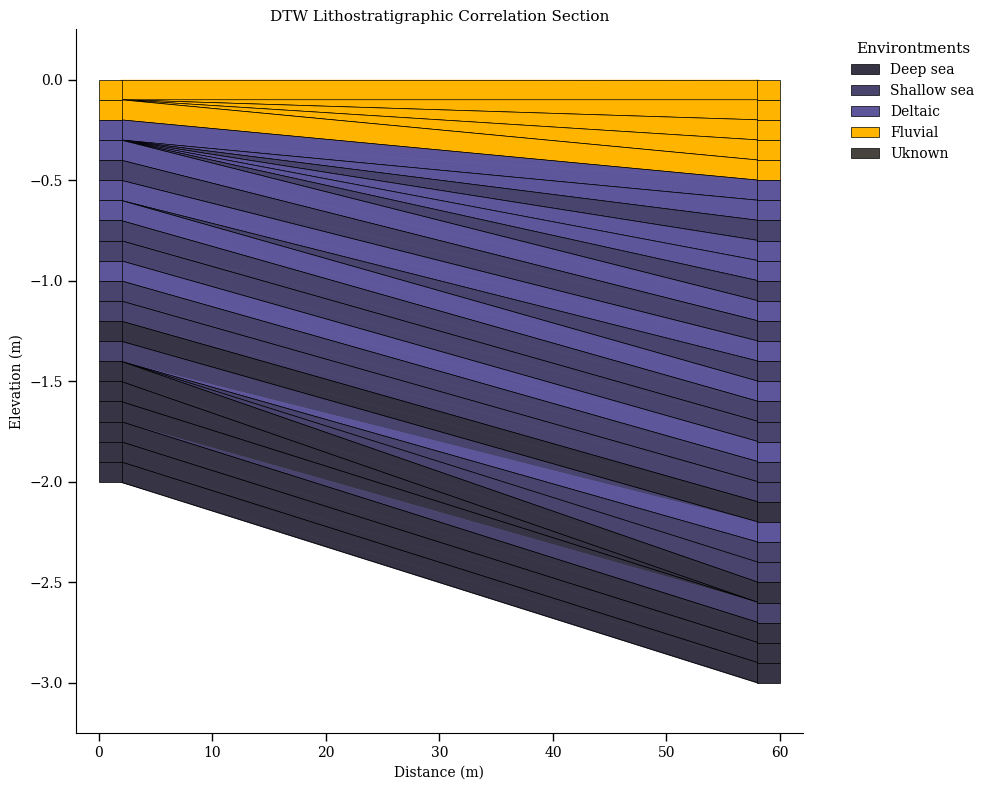

In [4]:
space = 60

distance, corr_matrix = scr.dtw_log(col_1, col_2, distality=1, alpha=0.49, cost_func="litho", penalty=0.0)
col_3, corr_path = scr.warp_log(col_1, col_2, paths=corr_matrix)

fig, ax = plt.subplots(figsize=(10, 8))

ax = scr.plot_section(col_1, col_2, space=space, corr_path=corr_path, ax=ax, lw=0.5)

ax.set(
    title="DTW Lithostratigraphic Correlation Section",
    xlabel="Distance (m)",
    ylabel="Elevation (m)",
    xlim=(0 - space/30, space + space/30),
    ylim=(min(col_1["bottom"].min(), col_2["bottom"].min()) - 0.25, max(col_1["bottom"].max(), col_2["bottom"].max()) + 0.25),
)

fig.savefig("../images/dtw_lithostratigraphic_correlation_section.png", dpi=300, bbox_inches="tight")

plt.show()